# **K-Means Clustering**  
### *Grupowanie K-średnich*

---

## **English**

K-Means is one of the most popular unsupervised learning algorithms used for cluster analysis. It aims to partition n observations into k clusters, where each observation belongs to the cluster with the nearest mean (centroid).

### **Algorithm Steps**

1. **Initialize**: Choose the number of clusters k and randomly place k centroids
2. **Assign**: Assign each data point to the nearest centroid
3. **Update**: Calculate new centroids as the mean of assigned points
4. **Repeat**: Steps 2-3 until convergence

### **Objective Function**

K-Means minimizes the Within-Cluster Sum of Squares (WCSS):

$$
J = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2
$$

where:
- $k$ is the number of clusters
- $C_i$ is the i-th cluster
- $\mu_i$ is the centroid of cluster $C_i$
- $||x - \mu_i||^2$ is the squared Euclidean distance

### **Choosing the Number of Clusters**

**Elbow Method**: Plot WCSS vs number of clusters and look for the "elbow" point where the rate of decrease sharply changes.

---

## **Polish**

K-Means to jeden z najpopularniejszych algorytmów uczenia nienadzorowanego używanych do analizy skupień. Jego celem jest podział n obserwacji na k klastrów, gdzie każda obserwacja należy do klastra z najbliższą średnią (centroidem).

### **Kroki algorytmu**

1. **Inicjalizacja**: Wybór liczby klastrów k i losowe umieszczenie k centroidów
2. **Przypisanie**: Przypisanie każdego punktu danych do najbliższego centroidu
3. **Aktualizacja**: Obliczenie nowych centroidów jako średniej z przypisanych punktów
4. **Powtórzenie**: Kroków 2-3 do zbieżności

### **Funkcja celu**

K-Means minimalizuje sumę kwadratów odległości wewnątrz klastrów (WCSS):

$$
J = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2
$$

gdzie:
- $k$ to liczba klastrów
- $C_i$ to i-ty klaster
- $\mu_i$ to centroid klastra $C_i$
- $||x - \mu_i||^2$ to kwadrat odległości euklidesowej


Dataset shape | Kształt zbioru danych: (300, 2)
True number of clusters | Prawdziwa liczba klastrów: 4


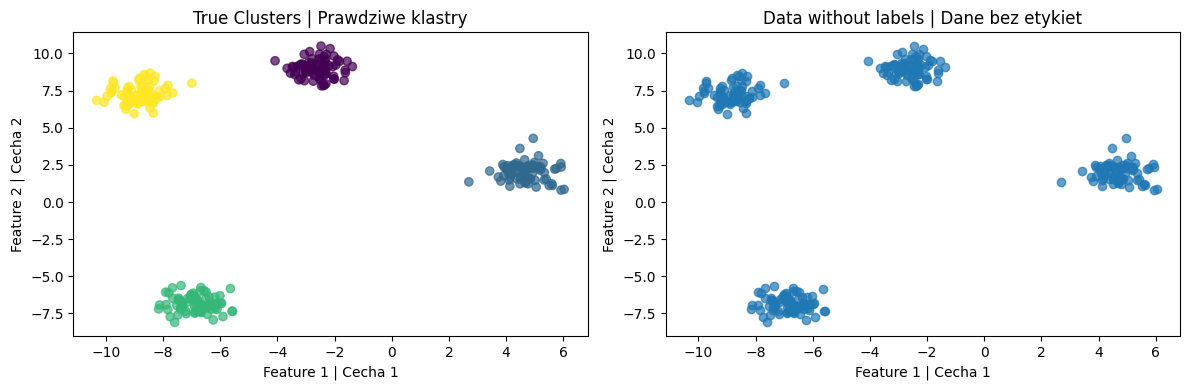

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import silhouette_score, adjusted_rand_score
import seaborn as sns

# Generate sample data with clear clusters
# Generowanie przykładowych danych z wyraźnymi klastrami
np.random.seed(42)
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

print("Dataset shape | Kształt zbioru danych:", X.shape)
print("True number of clusters | Prawdziwa liczba klastrów:", len(np.unique(y_true)))

# Visualize the original data
# Wizualizacja oryginalnych danych
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', alpha=0.7)
plt.title('True Clusters | Prawdziwe klastry')
plt.xlabel('Feature 1 | Cecha 1')
plt.ylabel('Feature 2 | Cecha 2')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title('Data without labels | Dane bez etykiet')
plt.xlabel('Feature 1 | Cecha 1')
plt.ylabel('Feature 2 | Cecha 2')

plt.tight_layout()
plt.show()


c:\Users\krzyc\anaconda3\envs\mldl-cookbook\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score | Współczynnik sylwetki: 0.876
Adjusted Rand Index | Skorygowany indeks Rand: 1.000
Inertia (WCSS) | Inercja (WCSS): 203.89


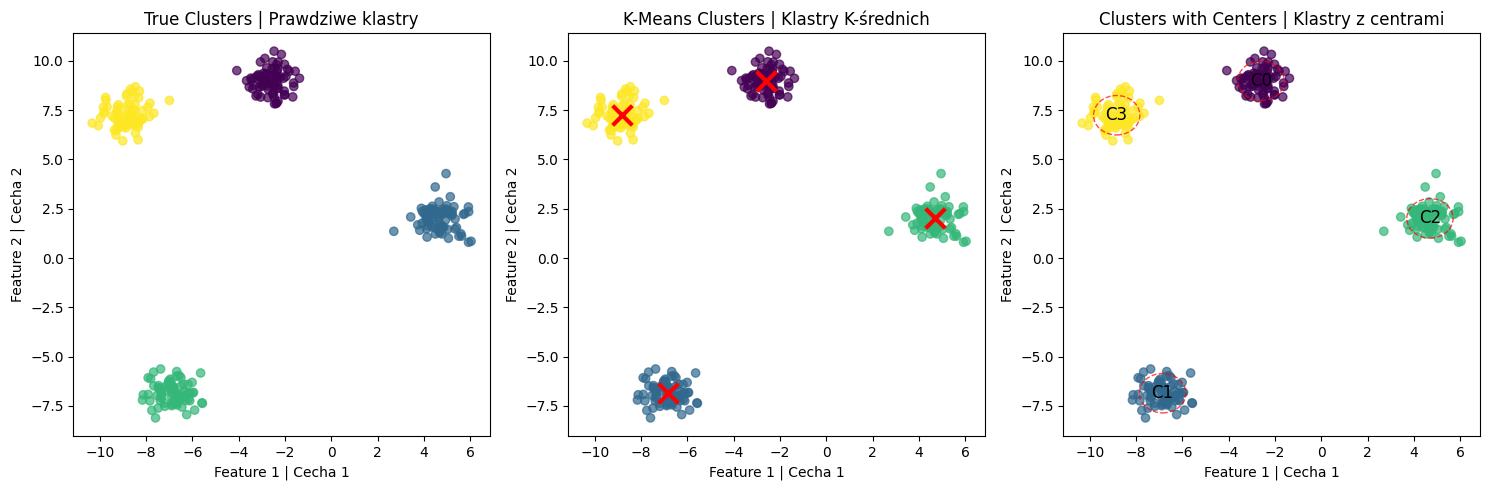

In [2]:
# Apply K-Means clustering
# Zastosowanie grupowania K-średnich
k = 4  # We know there are 4 true clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)

# Get cluster centers
# Pobranie centrów klastrów
centers = kmeans.cluster_centers_

# Calculate metrics
# Obliczenie metryk
silhouette_avg = silhouette_score(X, y_pred)
ari_score = adjusted_rand_score(y_true, y_pred)

print(f"Silhouette Score | Współczynnik sylwetki: {silhouette_avg:.3f}")
print(f"Adjusted Rand Index | Skorygowany indeks Rand: {ari_score:.3f}")
print(f"Inertia (WCSS) | Inercja (WCSS): {kmeans.inertia_:.2f}")

# Visualize the results
# Wizualizacja wyników
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', alpha=0.7)
plt.title('True Clusters | Prawdziwe klastry')
plt.xlabel('Feature 1 | Cecha 1')
plt.ylabel('Feature 2 | Cecha 2')

plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.title('K-Means Clusters | Klastry K-średnich')
plt.xlabel('Feature 1 | Cecha 1')
plt.ylabel('Feature 2 | Cecha 2')

plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', alpha=0.7)
for i, center in enumerate(centers):
    circle = plt.Circle(center, 1.0, fill=False, color='red', linestyle='--', alpha=0.7)
    plt.gca().add_patch(circle)
    plt.text(center[0], center[1], f'C{i}', fontsize=12, ha='center', va='center')
plt.title('Clusters with Centers | Klastry z centrami')
plt.xlabel('Feature 1 | Cecha 1')
plt.ylabel('Feature 2 | Cecha 2')

plt.tight_layout()
plt.show()


c:\Users\krzyc\anaconda3\envs\mldl-cookbook\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\krzyc\anaconda3\envs\mldl-cookbook\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\krzyc\anaconda3\envs\mldl-cookbook\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\krzyc\anaconda3\envs\mldl-cookbook\lib\site-packages\sklearn\cluster\_

Suggested optimal k (elbow method) | Sugerowane optymalne k (metoda łokcia): 3


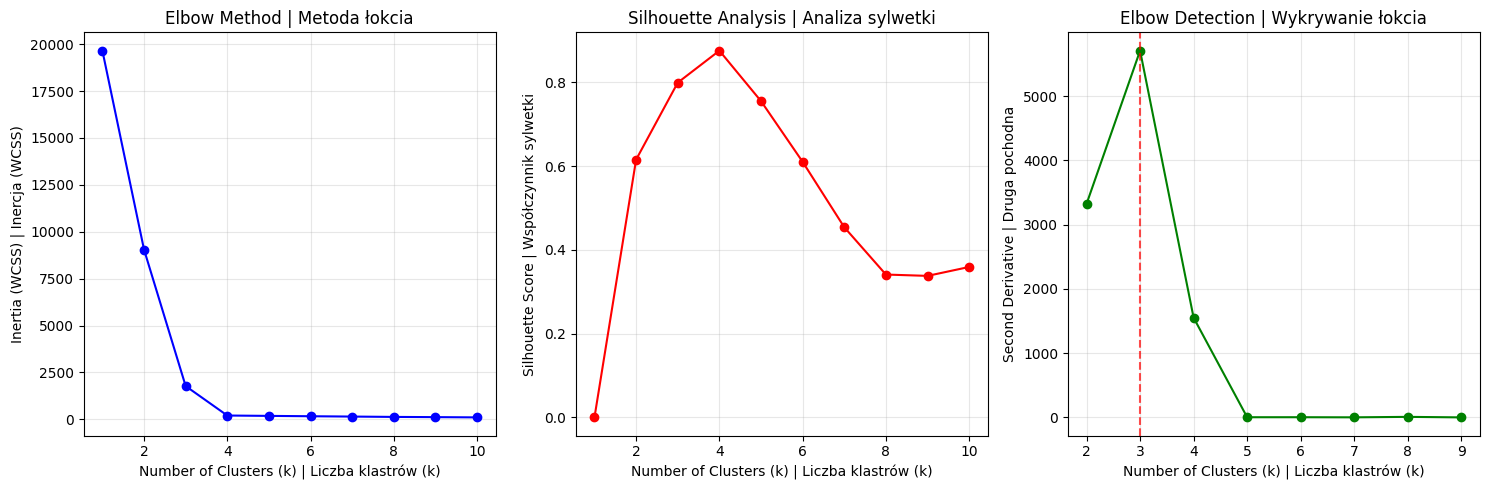

In [3]:
# Elbow Method to find optimal number of clusters
# Metoda łokcia do znalezienia optymalnej liczby klastrów

k_range = range(1, 11)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
    if k > 1:  # Silhouette score requires at least 2 clusters
        silhouette_avg = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(0)

# Plot the results
# Wykres wyników
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k) | Liczba klastrów (k)')
plt.ylabel('Inertia (WCSS) | Inercja (WCSS)')
plt.title('Elbow Method | Metoda łokcia')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k) | Liczba klastrów (k)')
plt.ylabel('Silhouette Score | Współczynnik sylwetki')
plt.title('Silhouette Analysis | Analiza sylwetki')
plt.grid(True, alpha=0.3)

# Find the elbow point (simplified method)
# Znajdowanie punktu łokcia (uproszczona metoda)
differences = []
for i in range(1, len(inertias)-1):
    diff = inertias[i-1] - 2*inertias[i] + inertias[i+1]
    differences.append(diff)

optimal_k = differences.index(max(differences)) + 2
print(f"Suggested optimal k (elbow method) | Sugerowane optymalne k (metoda łokcia): {optimal_k}")

plt.subplot(1, 3, 3)
plt.plot(range(2, len(inertias)), differences, 'go-')
plt.axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7)
plt.xlabel('Number of Clusters (k) | Liczba klastrów (k)')
plt.ylabel('Second Derivative | Druga pochodna')
plt.title('Elbow Detection | Wykrywanie łokcia')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
